# Esercitazione 10

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
import networkx as nx
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In questa esercitazione si utilizza il calcolo parallelo per eseguire più ricerca di una soluzione ottimale con l'algoritmo genetico.

## Esercizio 1

Per prima cosa parallelizzo il codice per gli algoritmi genetici come segue: ciascun nodo realizza, **insdipendentemente** dagli altri, una ricerca della soluzione ottimale utilizzando gli algoritmi genetici. 
Ogni $N_{migr}$ generazioni i diversi nodi si **scambiano**, in maniera casuale, gli individui più performanti.

### Descrizione dell'algoritmo:

Per prima cosa viene generato una popolazione di partenza, oltre ai parametri necessari a definire la popolazione e le sue caratteristiche, si fissa anche un parametro intero *scambio*.
A questo punto, su ciascun *continente* (ker), in maniera indipendente l'uno dall'altro, si avvia l'evoluzione della popolazione.
Quando si arriva alla generazione il cui indice coincide con *scambio*, si avvia tramite **broadcast** una *migrazione* degli individui che si ridistribuiscono a formare nuove popolazioni.

Per questo esercizio è stata utilizza una popolazione di 400 individui che è stata fatta evolvere, secondo la tecnica descritta sopra, per 1000 generazioni con una migrazione ogni 40 generazioni.

## Esercizio 2

Utilizzo il codice precedentemente implementato per affrontare il problema del commesso viaggiatore utilizzando come dati di input le coordinate delle 50 capitali statunitensi.

**Codice non parallelizzato**

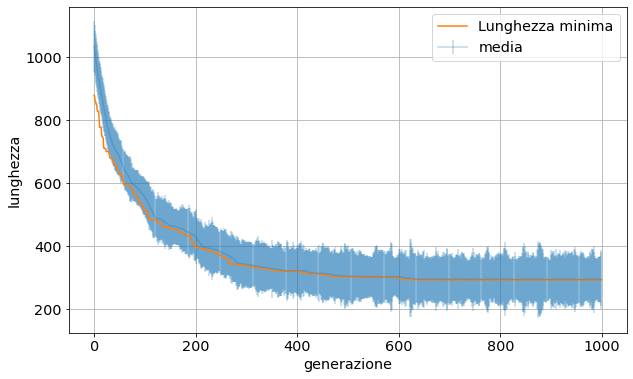

In [2]:
best, media, sigma = np.loadtxt("StatCap.dat", usecols=(0,1,2), unpack='true')
x = np.arange(len(media))

plt.errorbar(x, media,yerr=sigma, label="media", alpha=0.3)
plt.plot(x,best,label="Lunghezza minima")
plt.xlabel('generazione')
plt.ylabel('lunghezza')
plt.grid(True)
plt.legend()
plt.show()

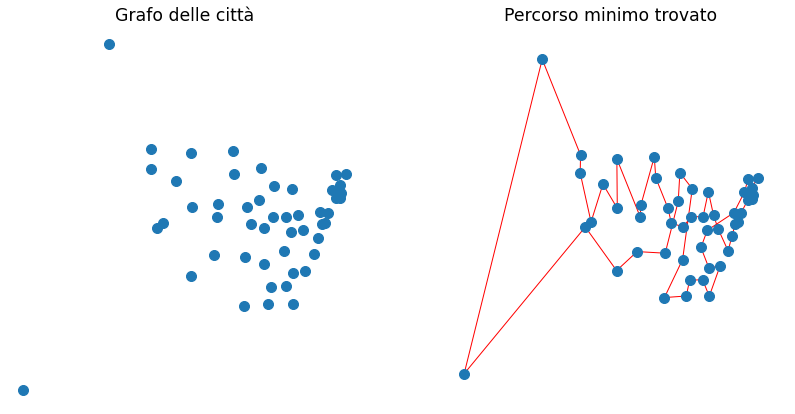

<Figure size 360x360 with 0 Axes>

In [3]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open('map_cap.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");

#Plotto il miglior percorso trovato
file = open('path_cap.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

La lunghezza minima trovata in questo caso è di $292.75$

**Codice parallelizzato**

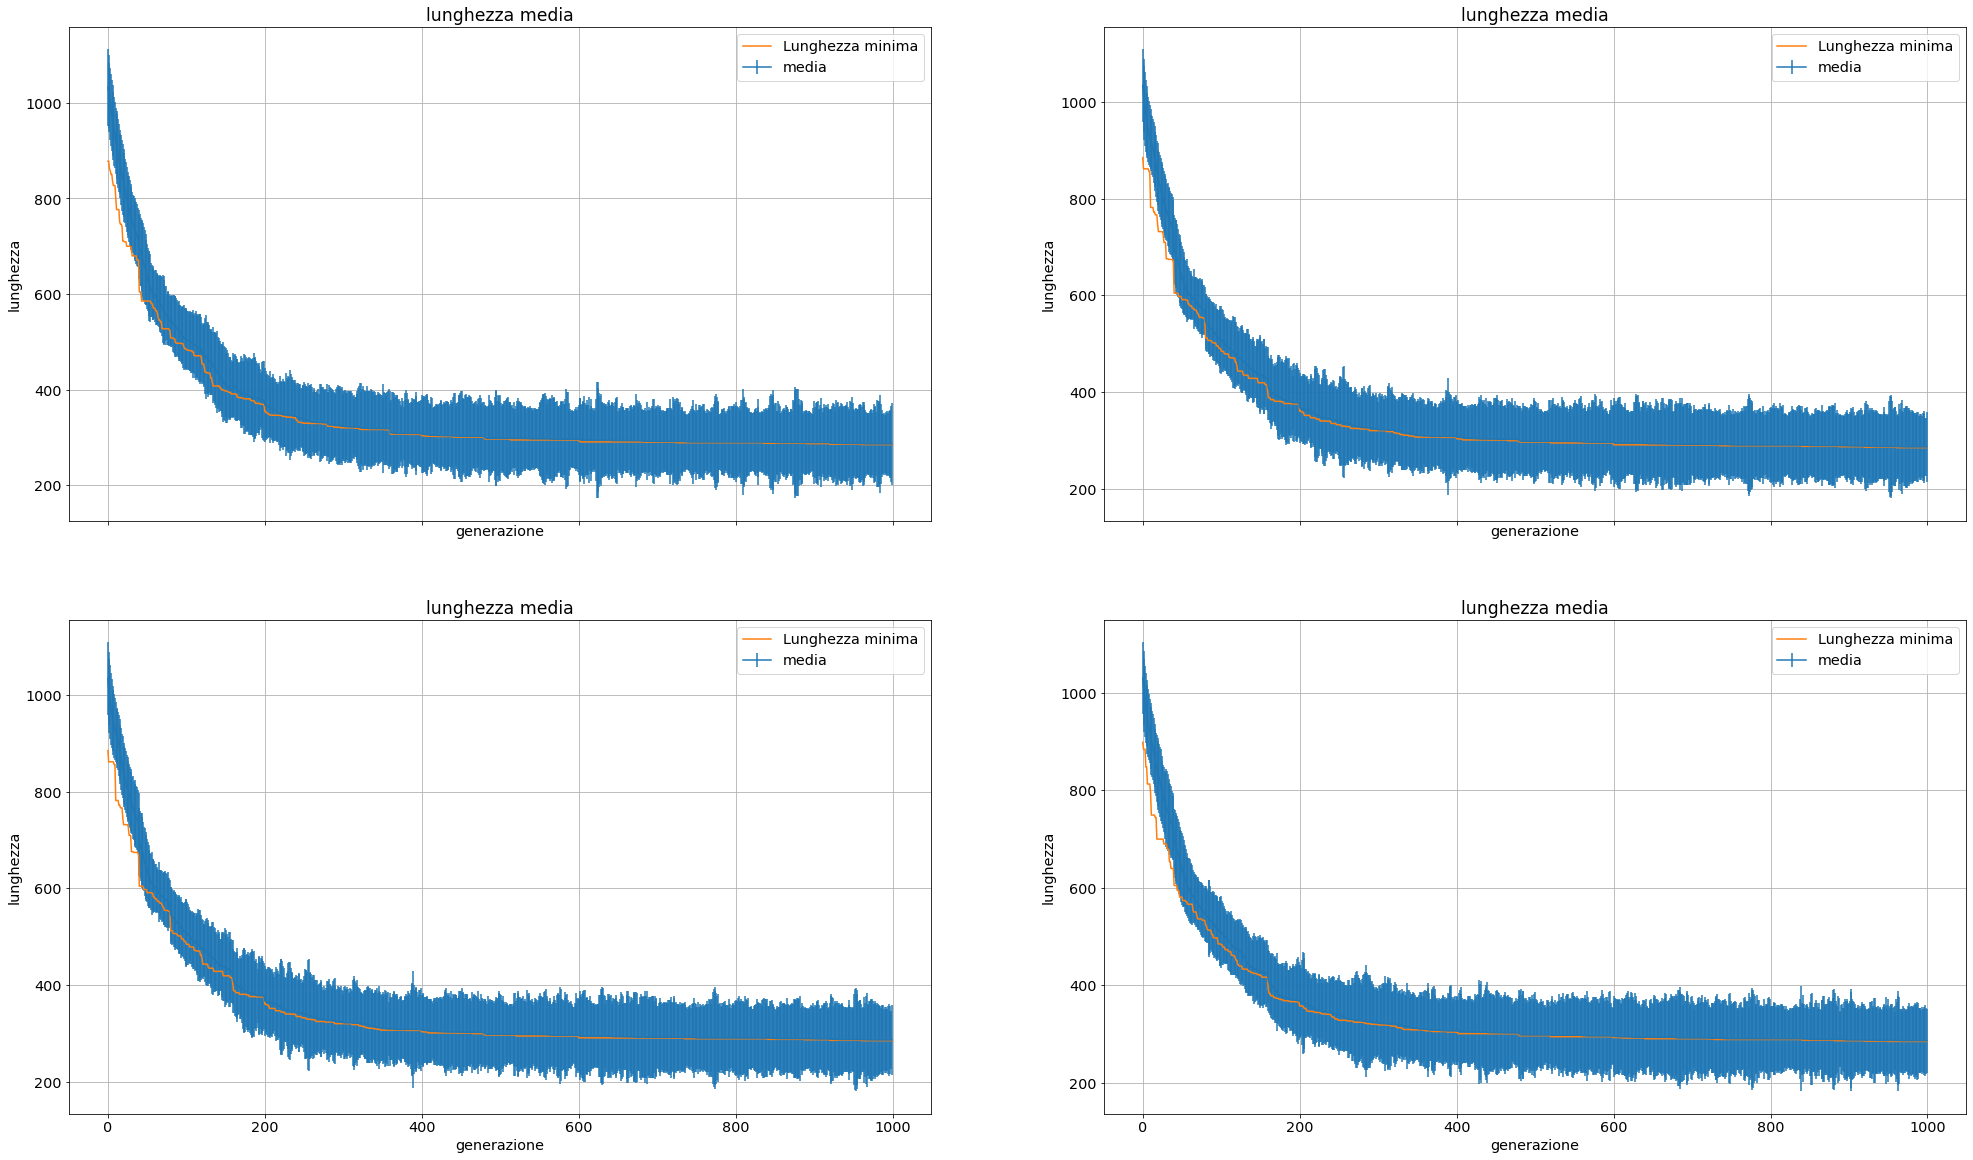

In [14]:
best0, media0, sigma0 = np.loadtxt("CapBest0.dat", usecols=(0,1,2), unpack='true')
best1, media1, sigma1 = np.loadtxt("CapBest1.dat", usecols=(0,1,2), unpack='true')
best2, media2, sigma2 = np.loadtxt("CapBest1.dat", usecols=(0,1,2), unpack='true')
best3, media3, sigma3 = np.loadtxt("CapBest3.dat", usecols=(0,1,2), unpack='true')
fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)
x = np.arange(len(best0))

axs[0,0].errorbar(x, media0, yerr=sigma0, label="media")
axs[0,1].errorbar(x, media1, yerr=sigma1, label="media")
axs[1,0].errorbar(x, media2, yerr=sigma2, label="media")
axs[1,1].errorbar(x, media3, yerr=sigma3, label="media")

axs[0,0].set_xlabel("generazione")
axs[0,1].set_xlabel("generazione")
axs[1,0].set_xlabel("generazione")
axs[1,1].set_xlabel("generazione")

axs[0,0].plot(x, best0, label="Lunghezza minima")
axs[0,1].plot(x, best1, label="Lunghezza minima")
axs[1,0].plot(x, best2, label="Lunghezza minima")
axs[1,1].plot(x, best3, label="Lunghezza minima")

axs[0,0].set_ylabel("lunghezza")
axs[0,1].set_ylabel("lunghezza")
axs[1,0].set_ylabel("lunghezza")
axs[1,1].set_ylabel("lunghezza")

axs[0,0].set_title("lunghezza media")
axs[0,1].set_title("lunghezza media")
axs[1,0].set_title("lunghezza media")
axs[1,1].set_title("lunghezza media")

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

plt.show()

**Confronto**

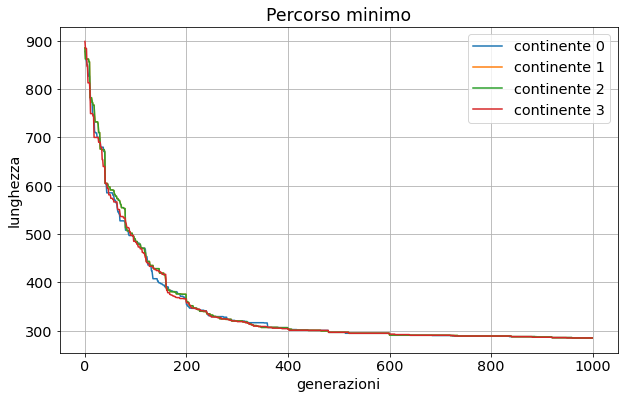

In [11]:
x = np.arange(len(best0))
plt.plot(x,best0,label="continente 0")
plt.plot(x,best1,label="continente 1")
plt.plot(x,best2,label="continente 2")
plt.plot(x,best3,label="continente 3")
plt.xlabel('generazioni')
plt.ylabel('lunghezza')
plt.grid(True)
plt.title('Percorso minimo')
plt.legend()
plt.show()

Dal grafico si osserva che rispetto al caso precedente, in cui l'algoritmo era non parallelizzato, la lunghezza media tende a convergere un poco più velocemente (scendo sotto il valore di 400 prima delle 200 generazioni). Questo è probabilmente dovuto alla struttura dell'algoritmo parallelizzato che consente sostanzialmente di far evolvere 4 popolazioni in contemporanea e in maniera indipendente l'una dall'altra.
In questo modo, quando avviene la *migrazione* si verifica un miglioramento della performance maggiore rispetto al caso della singola popolazione, evoluzioni in direzioni diverse hanno consentito infatti di trovare *possibili migliori soluzioni* diverse.

**Grafo**

Il grafo di seguito rappresenta il miglior percorso trovato dal presente algoritmo (lo stesso per tutti i kernel), la cui lunghezza è $284.75$. 

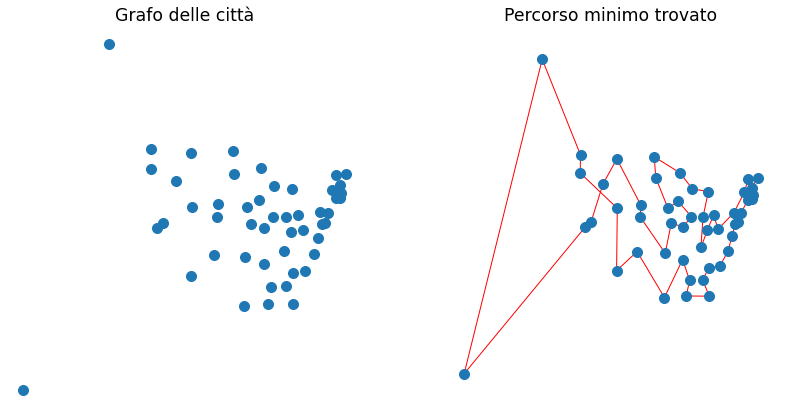

<Figure size 360x360 with 0 Axes>

In [10]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open('map_capP.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");

#Plotto il miglior percorso trovato
file = open('path_capP.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

Confrontando i due grafi si può inoltre osservare che la soluzione ottenuta dall'algoritmo parallelizzato è migliore risppetto a qeulla trovata dall'algoritmo non parallelizzato, infatti mentre nella prima se si osserva con attenzione si possono notare alcune intersezioni del percorso, in questa si ha una sola inetrsezione (ben visibile).